<h2>Import packages</h2>

In [19]:
import os
import numpy as np
from keras.preprocessing import image
from keras.utils import np_utils
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.optimizers import Adam
from keras.layers import Input,Dropout,Dense, Activation, Flatten
from keras.models import Model

<h2>Load Data</h2>

In [2]:
path='./EYE_Dataset/'
x_train=list()
x_test=list()
y_train=list()
y_test=list()
for i in os.listdir(path):
    if i=='train':
        for j in os.listdir(path+str(i)):
            for k in os.listdir(path+str(i)+"/"+str(j)):
                y_train.append(int(j))
                img_path=path+str(i)+"/"+str(j)+"/"+str(k)
                IMG=image.load_img(img_path,target_size=(224,224))
                x=image.img_to_array(IMG)
                x=preprocess_input(x)   #normalization
                x_train.append(x)
    elif i=='test':
        for j in os.listdir(path+str(i)):
            for k in os.listdir(path+str(i)+"/"+str(j)):
                y_test.append(int(j))
                img_path=path+str(i)+"/"+str(j)+"/"+str(k)
                IMG=image.load_img(img_path,target_size=(224,224))
                x=image.img_to_array(IMG)
                x=preprocess_input(x)   #normalization
                x_test.append(x)

<h2>Check input data that for model training</h2>

In [3]:
x_train = np.array(x_train)
x_test = np.array(x_test)
print(x_train.shape)
print(x_test.shape)

(522, 224, 224, 3)
(224, 224, 224, 3)


In [4]:
y_train=np_utils.to_categorical(y_train,2)
y_test=np_utils.to_categorical(y_test,2)
print(y_train.shape)
print(y_test.shape)

(522, 2)
(224, 2)


<h2>Training</h2>

In [5]:
image_input=Input(shape=(224,224,3))
model=InceptionV3(include_top=False, weights='imagenet', input_shape=(224,224,3),input_tensor=image_input)

last_layer = model.output
last_layer=Flatten()(last_layer)
last_layer=Dropout(0.5)(last_layer)
out = Dense(2, activation='softmax', name='softmax')(last_layer)
V3_model = Model(image_input, out)
V3_model.summary()

V3_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=1e-5),metrics=['accuracy'])
history=V3_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100,verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

Train on 522 samples, validate on 224 samples
Epoch 1/100
522/522 [==============================] - 41s 79ms/step - loss: 0.5884 - accuracy: 0.7318 - val_loss: 0.7669 - val_accuracy: 0.7768
Epoch 2/100
522/522 [==============================] - 7s 13ms/step - loss: 0.2816 - accuracy: 0.8851 - val_loss: 0.7129 - val_accuracy: 0.7812
Epoch 3/100
522/522 [==============================] - 7s 13ms/step - loss: 0.1251 - accuracy: 0.9617 - val_loss: 0.5369 - val_accuracy: 0.7812
Epoch 4/100
522/522 [==============================] - 7s 13ms/step - loss: 0.1151 - accuracy: 0.9674 - val_loss: 0.5611 - val_accuracy: 0.7812
Epoch 5/100
522/522 [==============================] - 7s 14ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.5075 - val_accuracy: 0.7946
Epoch 6/100
522/522 [==============================] - 7s 14ms/step - loss: 0.0627 - accuracy: 0.9789 - val_loss: 0.4140 - val_accuracy: 0.8125
Epoch 7/100
522/522 [==============================] - 7s 14ms/step - loss: 0.0514 - accu

<h2>Training result visualation</h2>

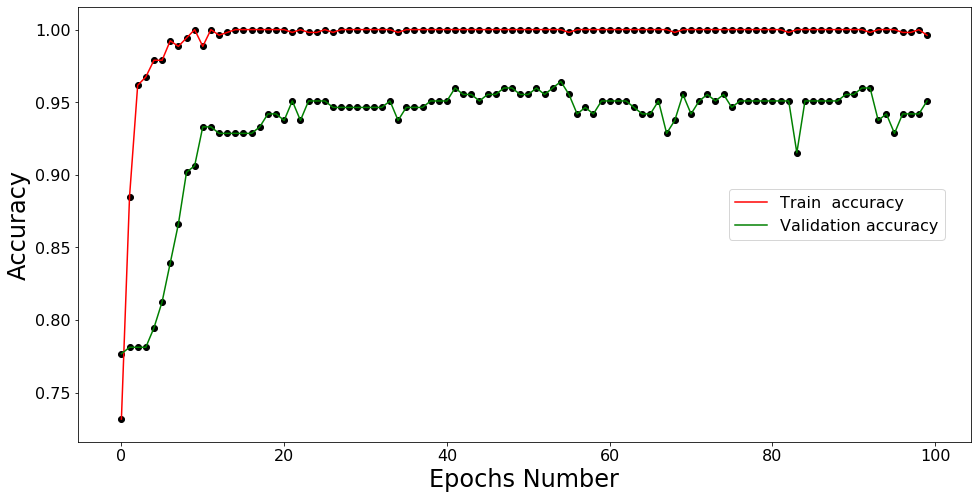

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
# plt.title("Accuracy",fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(history.history['accuracy'],color='red',label='Train  accuracy')
plt.plot(history.history['val_accuracy'],color='green',label='Validation accuracy')
plt.xlabel('Epochs Number',fontsize=24)
plt.ylabel('Accuracy',fontsize=24)
plt.scatter(range(100),history.history['accuracy'], color='black')
plt.scatter(range(100),history.history['val_accuracy'], color='black')
plt.legend(bbox_to_anchor=(0.72, 0.6), loc=2,ncol= 1, prop={'size': 16})
plt.savefig('ACC.jpg',dpi=300)

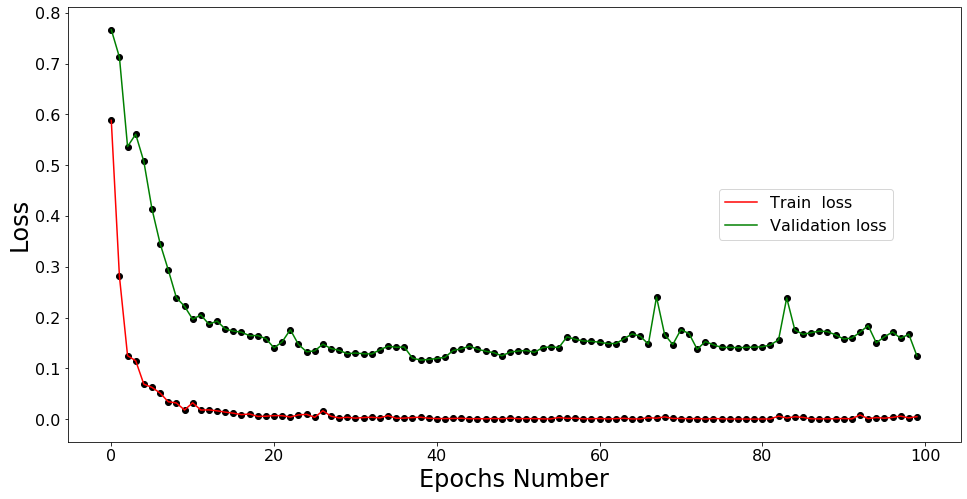

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
# plt.title("Accuracy",fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(history.history['loss'],color='red',label='Train  loss')
plt.plot(history.history['val_loss'],color='green',label='Validation loss')
plt.xlabel('Epochs Number',fontsize=24)
plt.ylabel('Loss',fontsize=24)
plt.scatter(range(100),history.history['loss'], color='black')
plt.scatter(range(100),history.history['val_loss'], color='black')
plt.legend(bbox_to_anchor=(0.72, 0.6), loc=2,ncol= 1, prop={'size': 16})
plt.savefig('loss.jpg',dpi=300)

<h2>Save model</h2>

In [18]:
V3_model.save('./InceptionV3.h5')

<h2>Evaluate model</h2>

In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Recall : ',recall_score(np.argmax(y_test,axis=1), np.argmax(V3_model.predict(x_test),axis=1), average='macro'))
print('F1-score : ',f1_score(np.argmax(y_test,axis=1), np.argmax(V3_model.predict(x_test),axis=1), average='macro'))

Recall :  0.9384469696969697
F1-score :  0.9286851321235275


Normalized confusion matrix


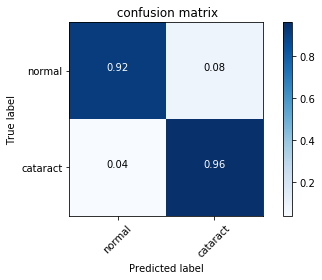

In [17]:
import seaborn as sns;
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
predict=np.argmax(V3_model.predict(x_test),axis=1).tolist()
y_true=np.argmax(y_test,axis=1).tolist()

y_pred = predict
y_true = y_true
target_names = ['normal','cataract']

plt.figure()
cnf_matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True,title=' confusion matrix')
plt.savefig('./confusion_matrix.jpg',dpi=300)
plt.show()